# Dimentionality Reduction

In [2]:
#####################
# necessary imports #
#####################

# data munging
import numpy as np
import pandas as pd

# text preprocessing 
from nltk.tokenize import word_tokenize

# topic modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

In [41]:
# reading in clean data
df = pd.read_csv('data/all_articles_clean.csv')

/Users/max/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
df.shape

(69848, 11)

In [43]:
# function to display top n terms associated with each topic

def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

## Non-Negative Matrix Factorization (NMF)

### Bi-gram
TF-IDF, stemmed

In [44]:
# selecting text and labels
text = df.stemmed # using stemmed body text + titles
labels = df.title

In [45]:
# selecting text and labels
text = df.stemmed # using stemmed body text + titles
labels = df.title

# tuning vectorizer params
tf_idf = TfidfVectorizer(stop_words='english',
                         tokenizer=word_tokenize,
                         max_df = 0.4,
                         min_df = 0.0005,
                         max_features = 25000,
                         ngram_range = (1,2))

# document-term matrix
doc_word = tf_idf.fit_transform(text)
print(doc_word.shape)

# convert from sparse matrix to df to viz, can skip df for big corpus
doc_word_df = pd.DataFrame(doc_word.toarray(), 
                       index=labels, 
                       columns=tf_idf.get_feature_names())

(69848, 25000)


In [48]:
n = 17 # number of topics

# model selection, fit/trans, and hyperparameter tuning
nmf_model_1 = NMF(n_components =n)

# doc-topic matrix
doc_topic = nmf_model_1.fit_transform(doc_word)

# creating ids for each topic
topic_ids = ["topic"+str(val) for val in range(n)]

# topic-term matrix
topic_word = pd.DataFrame(nmf_model_1.components_.round(n),
             index = topic_ids,
             columns = tf_idf.get_feature_names())

# prints top x words in each topic
display_topics(nmf_model_1, 
               tf_idf.get_feature_names(), 
               30) # number of top words/topic


Topic  0
hi, say, stori, peopl, like, think, column, obama, just, paper, know, dont, want, day, polit, did, report, thing, campaign, make, becaus, write, white, ask, hous, post, bush, year, reader, way

Topic  1
revenu, million, advertis, quarter, ad, cent, percent, advertis revenu, share, compani, ad revenu, increas, earn, year, declin, classifi, compar, billion, fell, cent share, total, growth, period, expect, profit, result, rose, retail, drop, categori

Topic  2
tribun, chicago, chicago tribun, lo, angel, lo angel, suntim, star tribun, compani, star, angel time, zell, tribun publish, bankruptci, million, deal, tribun media, chicago suntim, holling, debt, newsday, bid, station, stock, plan, sam zell, la, sam, sharehold, hoy

Topic  3
editor, manag editor, manag, sport, execut editor, publish, serv, daili, assist, editor publish, paper, execut, report, sport editor, deputi, news editor, editori, newsroom, join, herald, promot, staff, ha editor, appoint, assist manag, work, citi, yea

In [42]:
topic_word.to_csv('data/topic_word.csv')

In [6]:
topic_names = ['No Topic', # topic 0
                'Revenue and Share Price', # topic 1
                'Major Paper Bankruptcies', # topic 2
                'Newspeople', # topic 3
                'Editorial Cartoons', # topic 4
                'Exec Newspeople', # topic 5
                'Journalism Awards', # topic 6
                'War in Middle East', # topic 7
                'Online Publishing', # topic 8
                'Major National Newspapers', # topic 9
                'Social Media & Fake News', # topic 10
                'Legal Issues', # topic 11
                'Freedom of Press', # topic 12
                'Union Issues', # topic 13
                'Wall Street & WSJ', # topic 14
                'Circulation & Distribution', # topic 15
                'Mergers & Aquisitions', # topic 16
]


In [7]:
topic_dict = {}
for idx, name in enumerate(topic_names):
    topic_dict[idx] = name    

In [8]:
topic_dict

{0: 'No Topic',
 1: 'Revenue and Share Price',
 2: 'Major Paper Bankruptcies',
 3: 'Newspeople',
 4: 'Editorial Cartoons',
 5: 'Exec Newspeople',
 6: 'Journalism Awards',
 7: 'War in Middle East',
 8: 'Online Publishing',
 9: 'Major National Newspapers',
 10: 'Social Media & Fake News',
 11: 'Legal Issues',
 12: 'Freedom of Press',
 13: 'Union Issues',
 14: 'Wall Street & WSJ',
 15: 'Circulation & Distribution',
 16: 'Mergers & Aquisitions'}

In [82]:
# topic-doc matrix
Vt0 = pd.DataFrame(doc_topic[:20000].round(5),
             index = labels[:20000],
             columns = topic_names)

In [83]:
Vt0.shape

(20000, 17)

In [84]:
# topic-doc matrix
Vt1 = pd.DataFrame(doc_topic[20000:40000].round(5),
             index = labels[20000:40000],
             columns = topic_names)

In [85]:
Vt1.shape

(20000, 17)

In [86]:
# topic-doc matrix
Vt2 = pd.DataFrame(doc_topic[40000:69849].round(5),
             index = labels[40000:69849],
             columns = topic_names)

In [87]:
Vt2.shape

(29848, 17)

In [88]:
Vt = pd.concat((Vt0, Vt1, Vt2))

In [89]:
Vt.shape

(69848, 17)

In [90]:
Vt['best_match_topic'] = Vt.apply((lambda x: x.argmax()), axis = 1)

In [91]:
Vt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69848 entries, Four Politicians in Four Debates Isn’t Enough! to USPS nixes rule for small papers  p.
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   No Topic                    69848 non-null  float64
 1   Revenue and Share Price     69848 non-null  float64
 2   Major Paper Bankruptcies    69848 non-null  float64
 3   Newspeople                  69848 non-null  float64
 4   Editorial Cartoons          69848 non-null  float64
 5   Exec Newspeople             69848 non-null  float64
 6   Journalism Awards           69848 non-null  float64
 7   War in Middle East          69848 non-null  float64
 8   Online Publishing           69848 non-null  float64
 9   Major National Newspapers   69848 non-null  float64
 10  Social Media & Fake News    69848 non-null  float64
 11  Legal Issues                69848 non-null  float64
 12  Freedom of Press 

In [92]:
Vt.to_csv('data/doc_topic.csv')

In [5]:
Vt = pd.read_csv('data/doc_topic.csv')

In [93]:
# dist of topics across all years

Vt.best_match_topic.value_counts()

15    7210
10    6660
5     5141
11    5093
0     4884
12    4759
3     4687
8     4684
4     4174
6     3941
9     3727
7     3452
1     3350
13    3092
2     2110
14    1668
16    1216
Name: best_match_topic, dtype: int64

In [94]:
# merging doc-topic with main df

df_merged = df.merge(Vt, how='left', on='title').drop('Unnamed: 0', axis=1)

In [95]:
# adding year as col
import datetime

df_merged['year'] = pd.DatetimeIndex(df_merged['pub_date']).year

In [96]:
df_merged.to_csv('data/all_articles_topics.csv')

In [97]:
# aggregating by year to get topic count by year

topic_by_year_df = (df_merged.groupby(['year','best_match_topic'])
                    .agg('count')
                    .sort_values(by=['year','title'], ascending=False)
                    .reset_index())

In [98]:
topic_by_year_df.drop(df_merged.columns.difference(['year','best_match_topic','title']), 1, inplace=True)

In [99]:
topic_by_year_df.rename(columns={'best_match_topic': 'topic_id', 'title': 'counts'}, inplace=True)

In [100]:
topic_by_year_df['topic_name'] = topic_by_year_df.topic_id.apply(lambda x: topic_dict[x])

In [101]:
topic_by_year_df.head(3)

,year,topic_id,counts,topic_name
0,2020,10,585,Social Media & Fake News
1,2020,12,508,Freedom of Press
2,2020,6,206,Journalism Awards


In [102]:
# converting to csv

topic_by_year_df.to_csv('data/topic_by_year_df.csv', index=False)

In [3]:
df_merged = pd.read_csv('data/all_articles_topics.csv')

In [4]:
topic_counts = df_merged.groupby('best_match_topic').count().title
topic_counts = topic_counts.sort_values(ascending=False)

In [9]:
topic_index = [topic_dict[x] for x in topic_counts.index]
topic_index

['Circulation & Distribution',
 'Social Media & Fake News',
 'Exec Newspeople',
 'Legal Issues',
 'No Topic',
 'Freedom of Press',
 'Newspeople',
 'Online Publishing',
 'Editorial Cartoons',
 'Journalism Awards',
 'Major National Newspapers',
 'War in Middle East',
 'Revenue and Share Price',
 'Union Issues',
 'Major Paper Bankruptcies',
 'Wall Street & WSJ',
 'Mergers & Aquisitions']

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

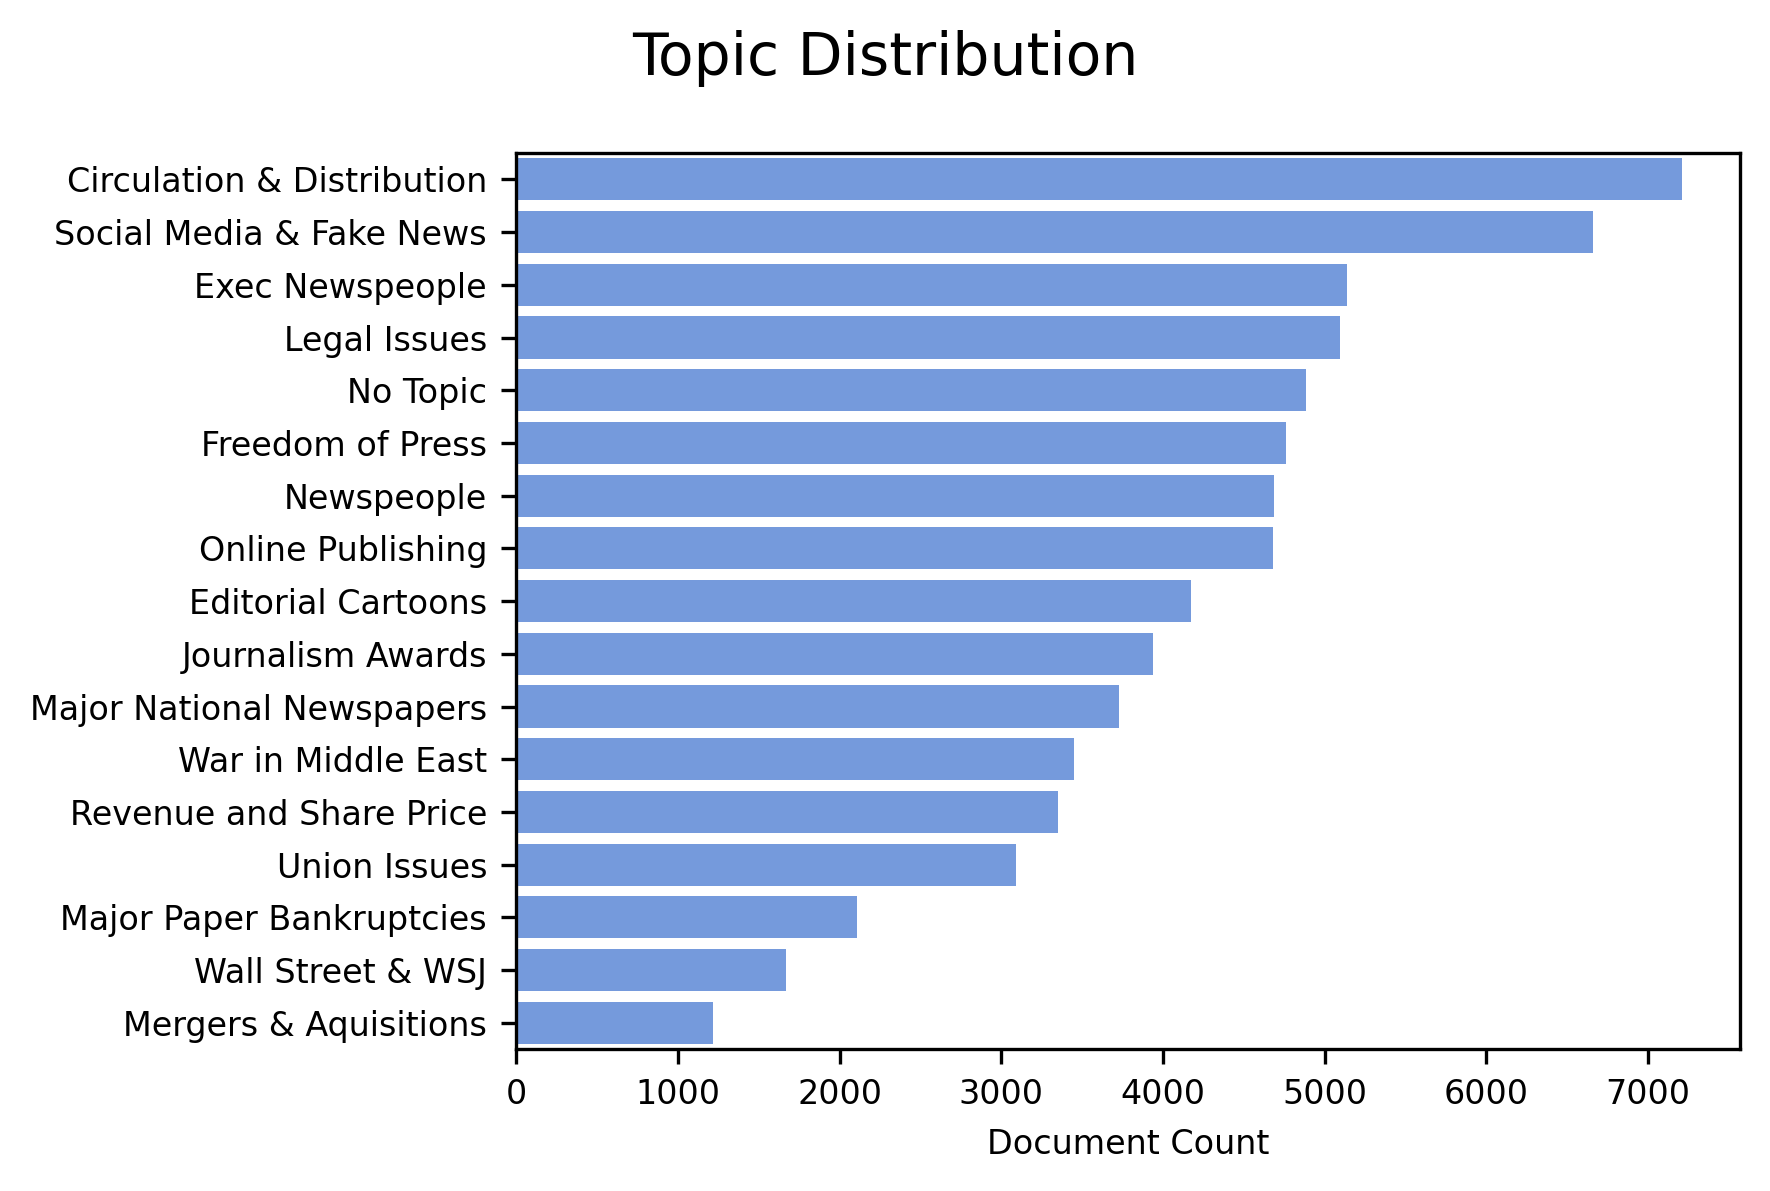

In [12]:
plt.figure(dpi=300)
sns.barplot(topic_counts, topic_index, color="cornflowerblue")
plt.suptitle('Topic Distribution', size=14)
plt.xlabel('Document Count', size=8)
plt.xticks(size=8)
plt.yticks(size=8)
plt.tight_layout()
plt.savefig('viz/topic_dist.svg')